# Part 1



1.   In this section below function ***loadImages(path)*** is implemented. The function in order to operate needs to be given the filepath from google drive where the images are stored. The function when called, returns a dataframe with 30 lines with the image labels and the image vector mapped.



In [59]:
import numpy as np
import cv2
import glob
import pandas as pd
import matplotlib.image as image 
import matplotlib.pyplot as plt 


def findLabel(imageFileName, path):
  
  _ret = None
  
  imageFileName = imageFileName.replace(path+'/', '')
  if(imageFileName.find("W")!=-1):
    _ret = '0'
  elif(imageFileName.find("F")!=-1):
    _ret = '1'
  elif(imageFileName.find("S")!=-1):
    _ret = '2' 
  
  return _ret

def loadImages(path):
  
  seasons = pd.DataFrame([])
  img_label_list = []

  for imageFileName in glob.glob(path+"/*.jpg"):
    
    img = plt.imread(imageFileName)
    img=cv2.resize(img,(100,100))

    ##get labels
    label = findLabel(imageFileName, path)
    img_label_list.append(label)

    ##store image to dataframe
    img = pd.Series(img.flatten(),name=imageFileName)
    seasons = seasons.append(img)

  return seasons, img_label_list


path  = "/content/drive/My Drive/University/images"
img_arr, img_label_arr = loadImages(path)
#print(img_arr)
#print(img_label_arr)


2.   In this section below function ***PCA_ImageSpaceVisualization(Χ)*** is implemented. The function needs to be given as a parameter the img_arr from above. The function when called, calculates the first two principal components of the data given and shows the data in these two components. 
The function returns a plot, visualizing the images in 2D space as this is derived from the projection of the data of the two primal components.

  [Source for image plot](https://https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points?fbclid=IwAR29FcfLOyIHOI6Mku3ocoaFHyrP7Je3N7TtANL33uyNcHk-O3TXkELmB9s)



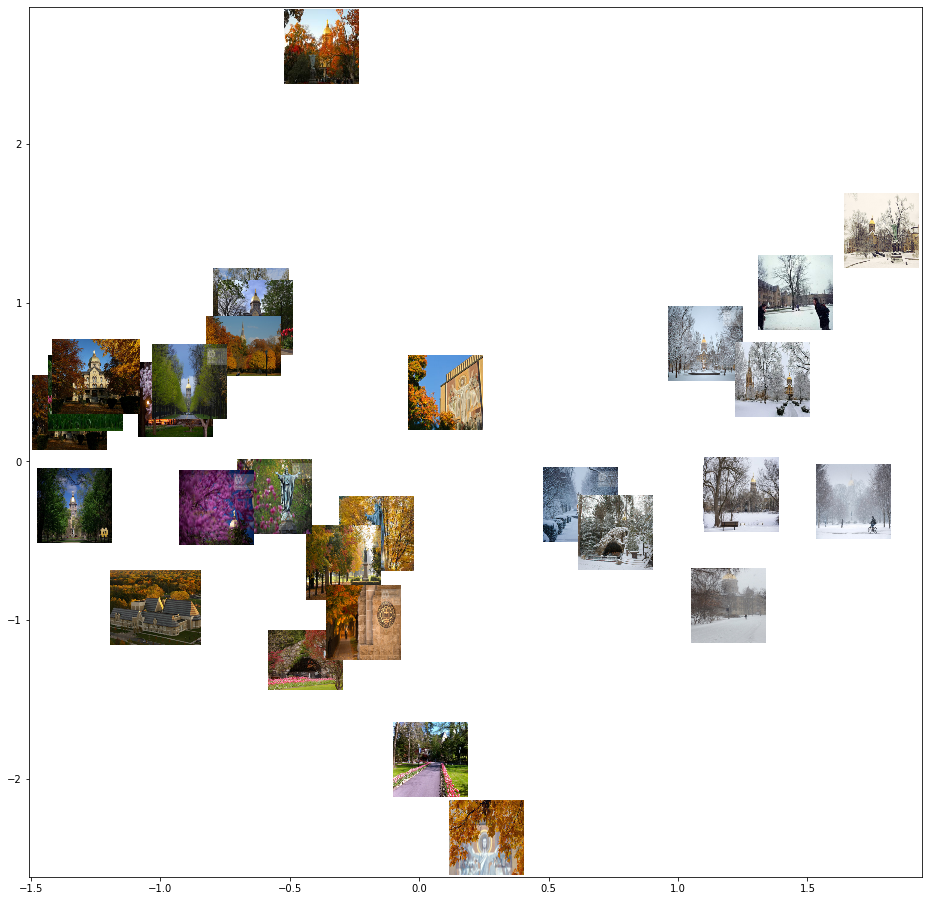

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom):
  return OffsetImage(plt.imread(path), zoom=zoom)

def PCA_ImageSpaceVisualization(X):
  
  n_components = 2  #number of components to compute
  pca = PCA(n_components=n_components, whiten=True).fit(X)

  components = pca.transform(X)

  pca_result_df = pd.DataFrame(components, index=X.index.values)
  x = pca_result_df[0]
  y = pca_result_df[1]
  image_path = pca_result_df.index.values

  fig, ax = plt.subplots(figsize=(16,16))
  ax.scatter(x, y) 

  for index, row in pca_result_df.iterrows():
    ab = AnnotationBbox(getImage(index, 0.3), (row[0], row[1]), frameon=False)
    ax.add_artist(ab)
    ax.autoscale()

#call
PCA_ImageSpaceVisualization(img_arr)
  